# 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('salary_data_cleaned.csv')

In [6]:
df.head()

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  What You Will Do:\r\n\r\nI. General Summary\r\...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\r\nJob ID: 310709\r...     3.8   
4  Data Scientist\r\nAffinity Solutions / Marketi...     2.9   

                            Company Name         Location    Headquarters  \
0                      Tecolote Research  Albuquerque, NM      Goleta, CA   
1  University of Maryland Medical System    Linthicum, MD   Baltimore, MD   
2                                KnowBe4   Clearwater, FL  Clearwater, FL   
3                                   PNNL     Richland, WA    Richland, WA   
4                     Affinity Solutions     New York, NY    New York, NY   

                     Size  Founded   Type of ownership  ... tech_spark  \
0   501 to 1000 employees     1973   Company - Private  ...          0   
1        10000+ employees     1984  Other Organization  ...          0   
2   501 to 1000 employees     2010   Company - Private  ...          1   
3  1001 to 5000 employees     1965          Government  ...          0   
4     51 to 200 employees     1998   Company - Private  ...          0   

  tech_aws tech_excel len_description bins_rating state_location  \
0        0          1            2555      medium             NM   
1        0          0            4828      medium             MD   
2        0          1            3495        high             FL   
3        0          0            3926      medium             WA   
4        0          0            2748         low             NY   

   state_headquarters  job_in_headquarters  age  num_competitors  
0                  CA                    0   48                0  
1                  MD                    0   37                0  
2                  FL                    1   11                0  
3                  WA                    1   56                3  
4                  NY                    1   23                3  

[5 rows x 33 columns]

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'title', 'level', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'tech_python', 'tech_java', 'tech_R', 'tech_spark', 'tech_aws',
       'tech_excel', 'len_description', 'bins_rating', 'state_location',
       'state_headquarters', 'job_in_headquarters', 'age', 'num_competitors'],
      dtype='object')

In [6]:
df.dtypes

Job Title               object
Salary Estimate         object
Job Description         object
Rating                 float64
Company Name            object
Location                object
Headquarters            object
Size                    object
Founded                  int64
Type of ownership       object
Industry                object
Sector                  object
Revenue                 object
Competitors             object
title                   object
level                   object
hourly                   int64
min_salary             float64
max_salary             float64
avg_salary             float64
tech_python              int64
tech_java                int64
tech_R                   int64
tech_spark               int64
tech_aws                 int64
tech_excel               int64
len_description          int64
bins_rating             object
state_location          object
state_headquarters      object
job_in_headquarters      int64
age                      int64
num_comp

<AxesSubplot:>

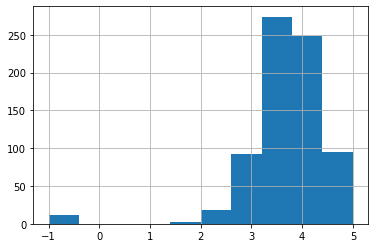

In [7]:
df['Rating'].hist()

Data is left skeqwed, so normalize it

<AxesSubplot:>

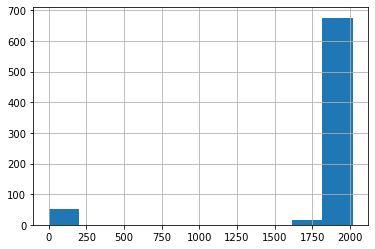

In [8]:
df['Founded'].hist()#this is due to -1, 

this is due to -1,  so consider age (it does not have -1, will be good to have in model rather than year)

<AxesSubplot:>

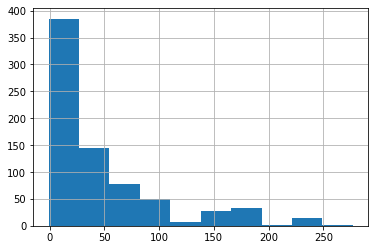

In [9]:
df['age'].hist()

<AxesSubplot:>

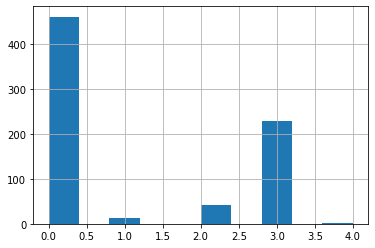

In [10]:
df['num_competitors'].hist()         

<AxesSubplot:>

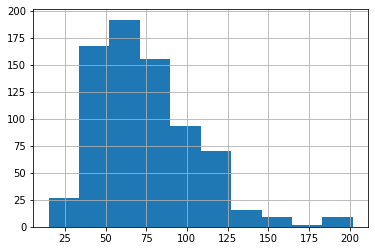

In [11]:
df['min_salary'].hist()

<AxesSubplot:>

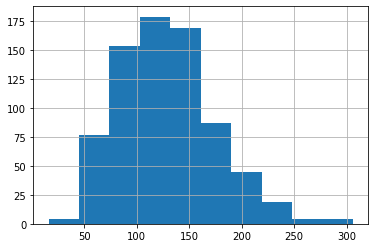

In [12]:
df['max_salary'].hist()

<AxesSubplot:>

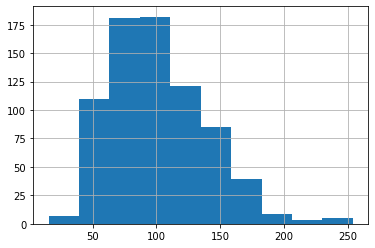

In [13]:
df['avg_salary'].hist()

In [ ]:
THese three series have little right skewed, normalize by applying log so it distibution can be even like gausian

## Box Plot

<AxesSubplot:>

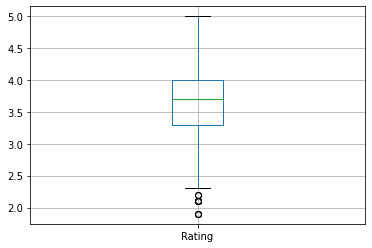

In [15]:
df[df['Rating']!=-1].boxplot('Rating')

<AxesSubplot:>

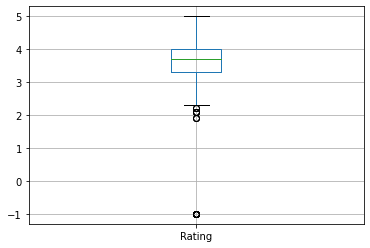

In [16]:
df.boxplot('Rating')

<AxesSubplot:>

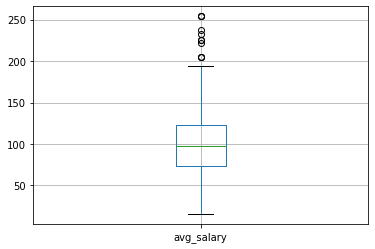

In [18]:
df.boxplot('avg_salary')

In [19]:
df['avg_salary_log'] = np.log(df['avg_salary'])

<AxesSubplot:>

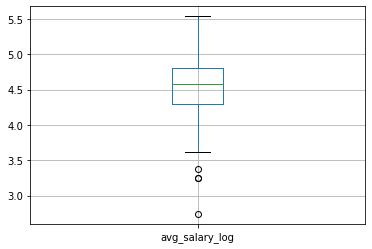

In [20]:
df.boxplot('avg_salary_log')

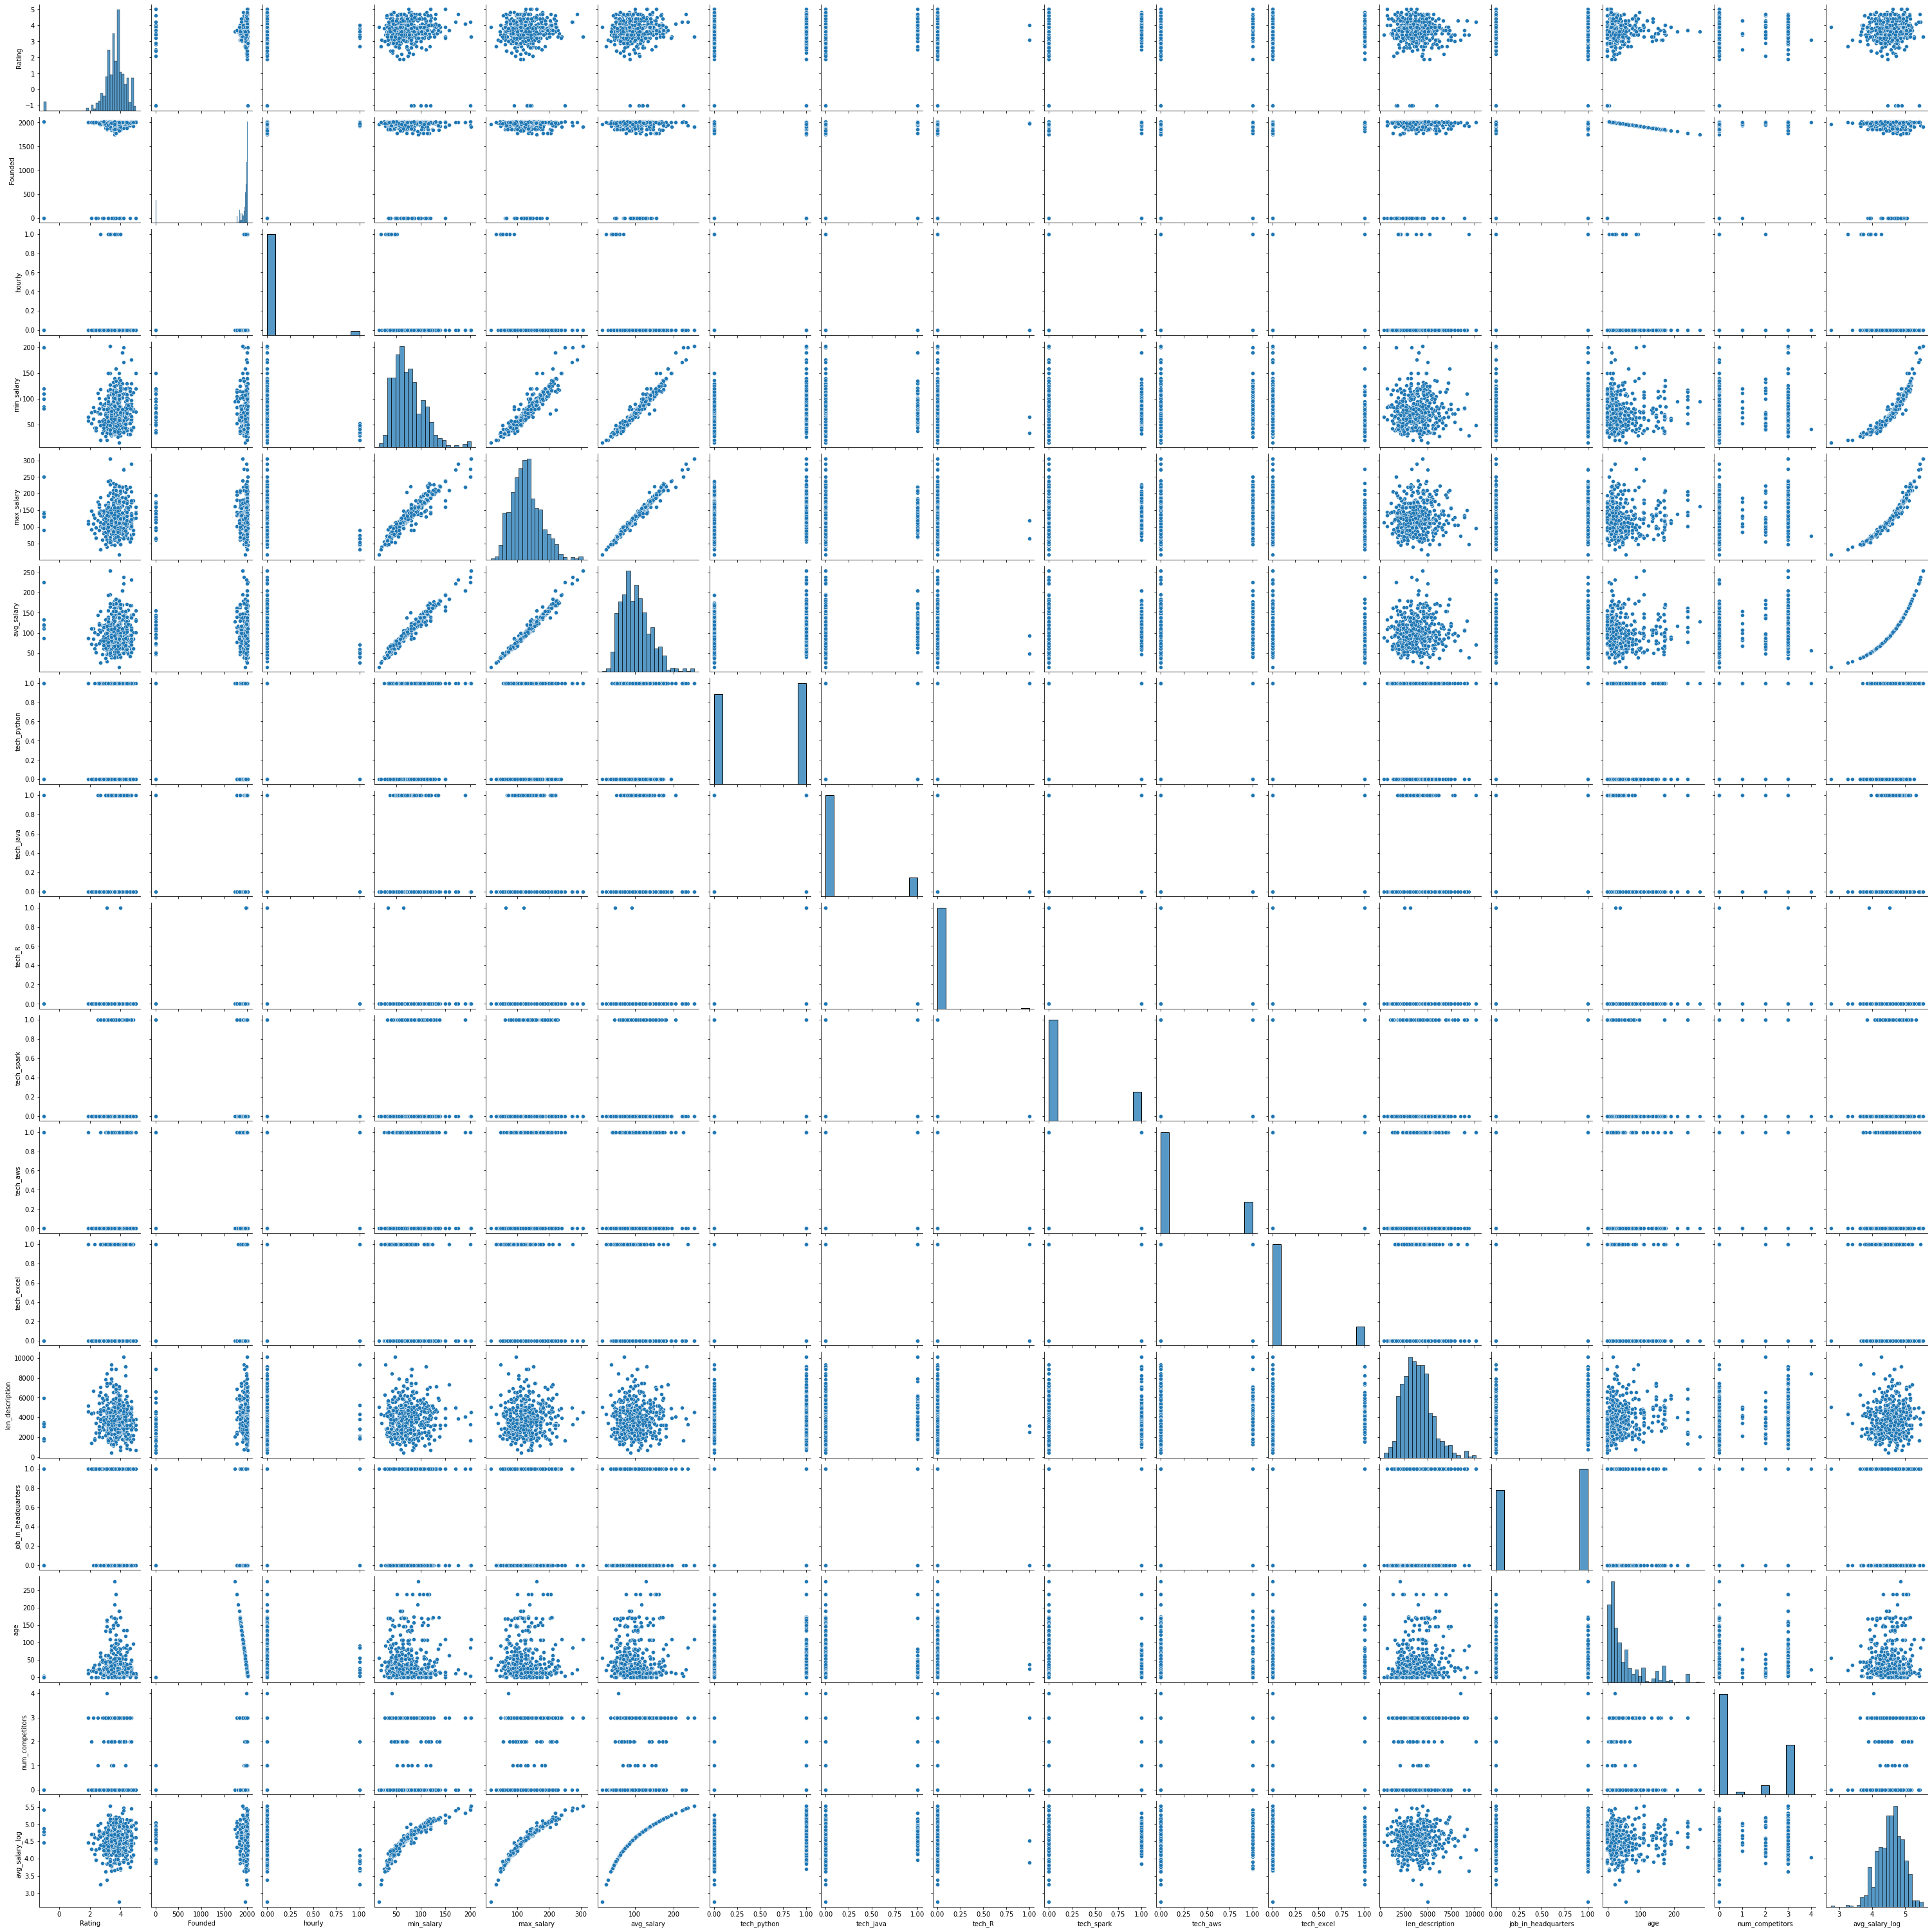

In [22]:
sns.pairplot(df)
# in the pair plot we can see visualization among variables in a higher level.
# if any linear relation between two variables then we can exclude one of the variable it is like redundant information to model.
# may be same definition can be taken after correlation heatmap as well, This could be taken in terms of numbers.

<AxesSubplot:>

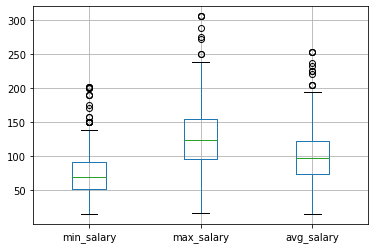

In [17]:
df.boxplot(['min_salary', 'max_salary', 'avg_salary'])

<AxesSubplot:>

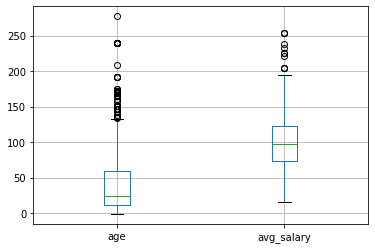

In [18]:
df.boxplot(['age', 'avg_salary'])

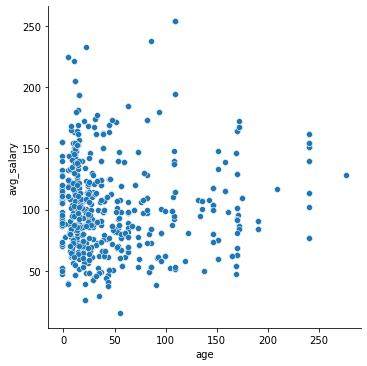

In [21]:
sns.relplot(x='age', y='avg_salary', data=df)# age of the company here

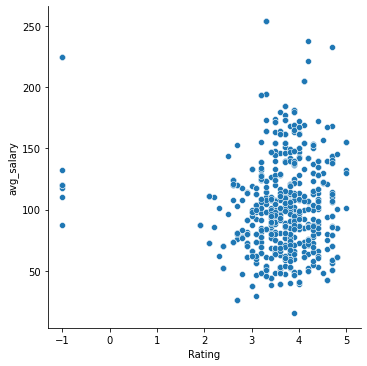

In [22]:
sns.relplot(x='Rating', y='avg_salary', data=df)

<AxesSubplot:>

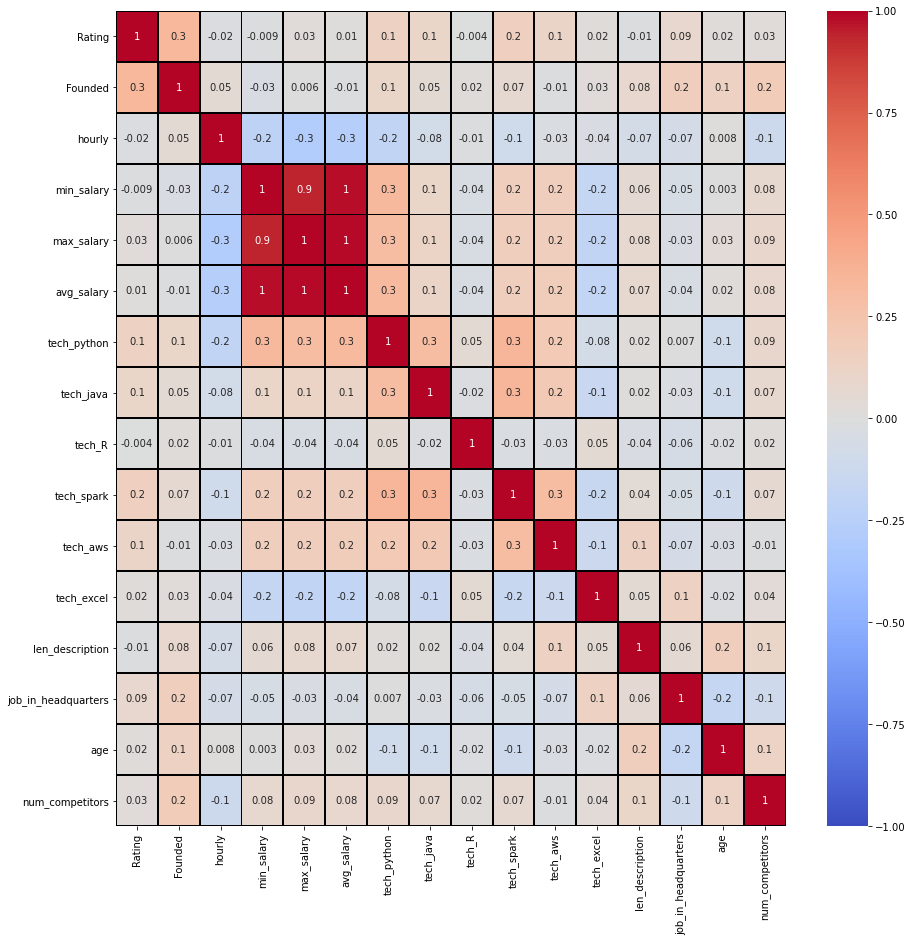

In [36]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black', ax=ax)

In [ ]:
 #any linear relation between two variables then we can exclude one of the variable it is like redundant information to model

In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'title', 'level', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'tech_python', 'tech_java', 'tech_R', 'tech_spark', 'tech_aws',
       'tech_excel', 'len_description', 'bins_rating', 'state_location',
       'state_headquarters', 'job_in_headquarters', 'age', 'num_competitors'],
      dtype='object')

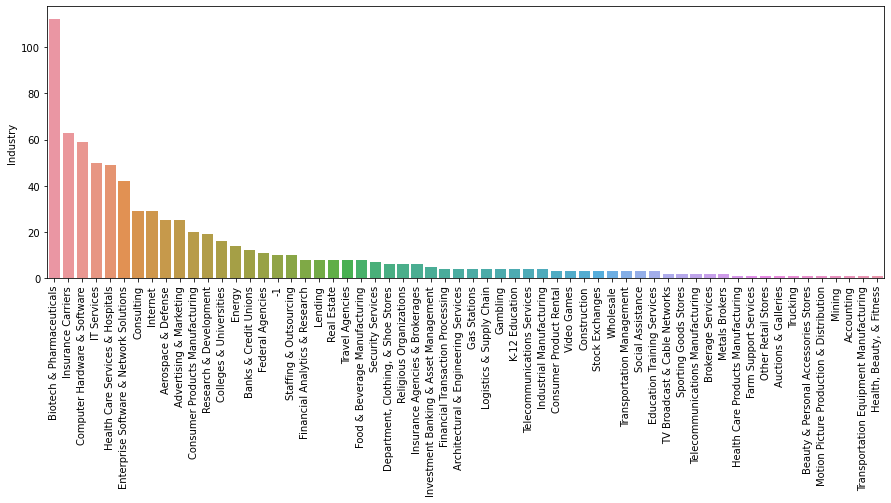

In [43]:
bar = df['Industry'].value_counts()
plt.subplots(figsize=(15,5))  
ct=sns.barplot(x=bar.index, y=bar)
ct.set_xticklabels(ct.get_xticklabels(), rotation=90)
plt.show()

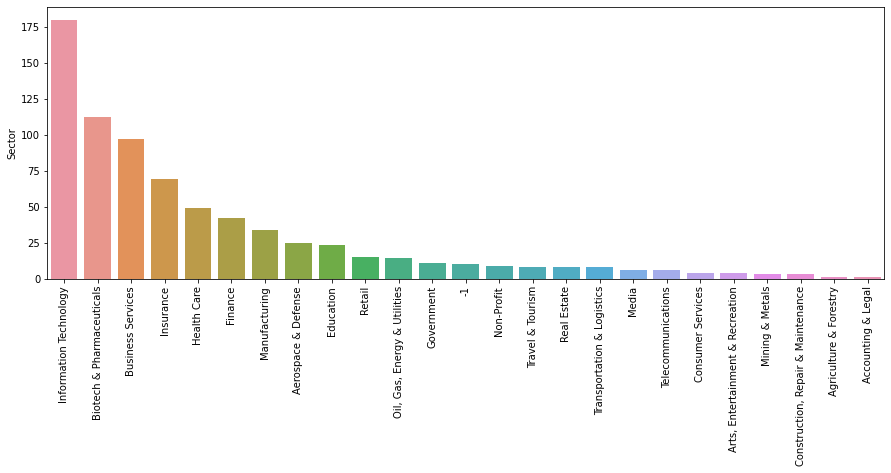

In [44]:
bar = df['Sector'].value_counts()
plt.subplots(figsize=(15,5))  
ct=sns.barplot(x=bar.index, y=bar)
ct.set_xticklabels(ct.get_xticklabels(), rotation=90)
plt.show()

skipping the column Job Title
skipping the column Salary Estimate
skipping the column Job Description
skipping the column Company Name
skipping the column Location
skipping the column Headquarters
Plot for Size


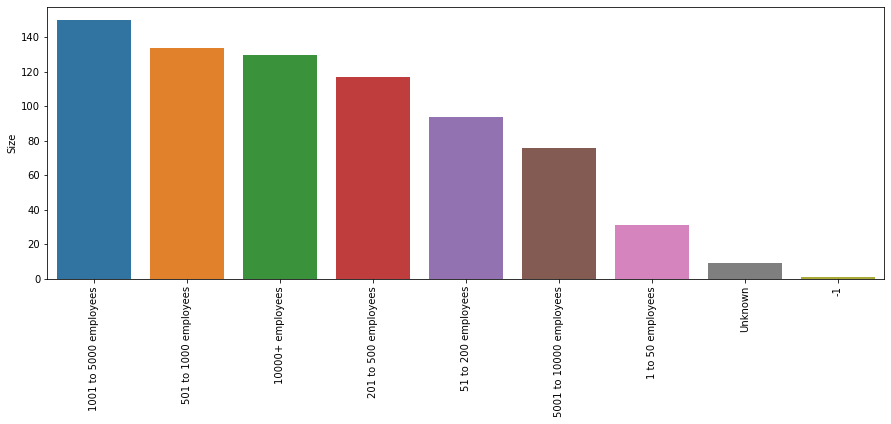

Plot for Type of ownership


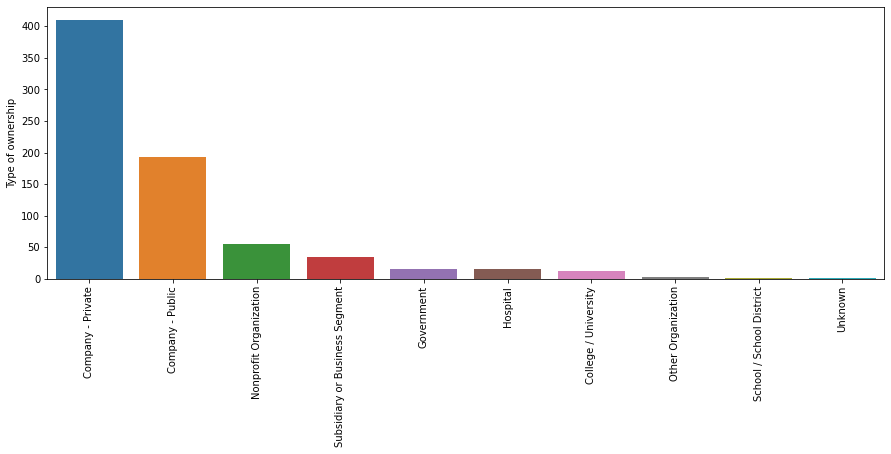

Plot for Industry


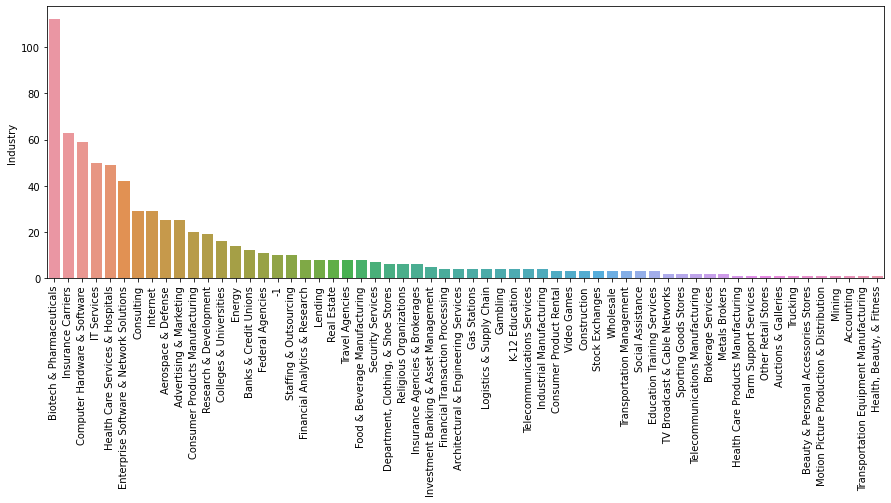

Plot for Sector


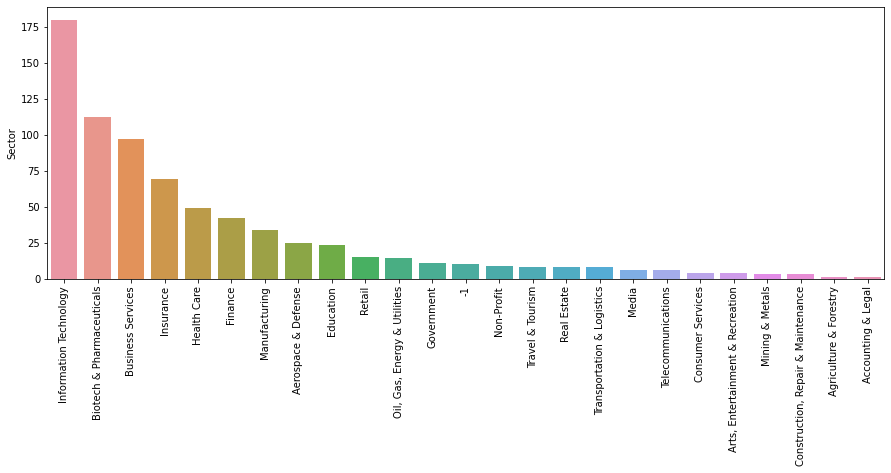

Plot for Revenue


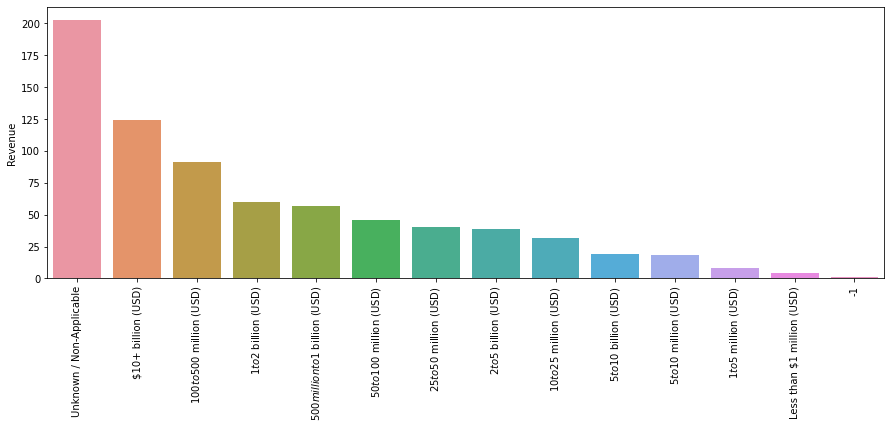

skipping the column Competitors
Plot for title


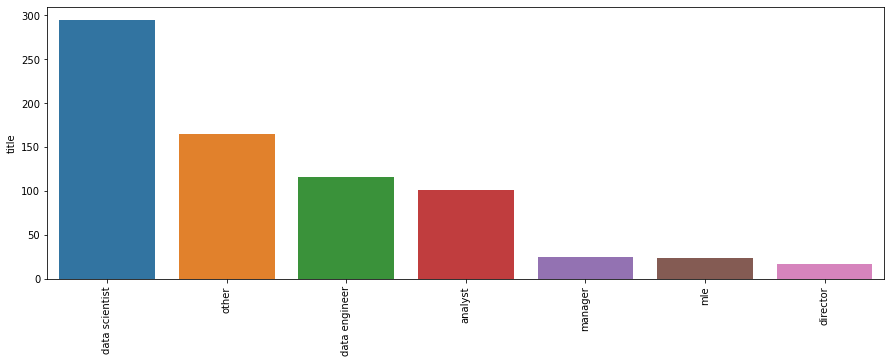

Plot for level


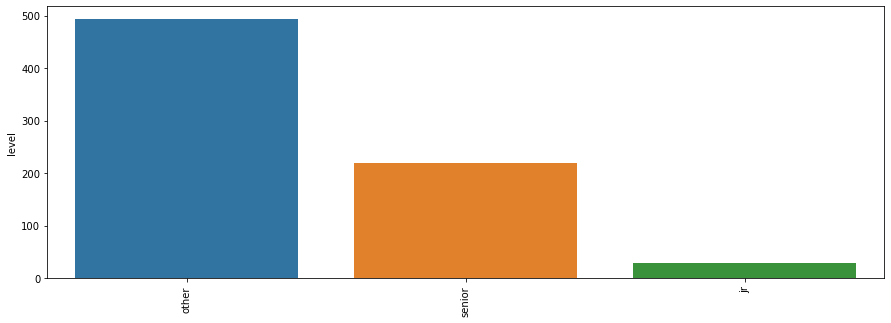

Plot for bins_rating


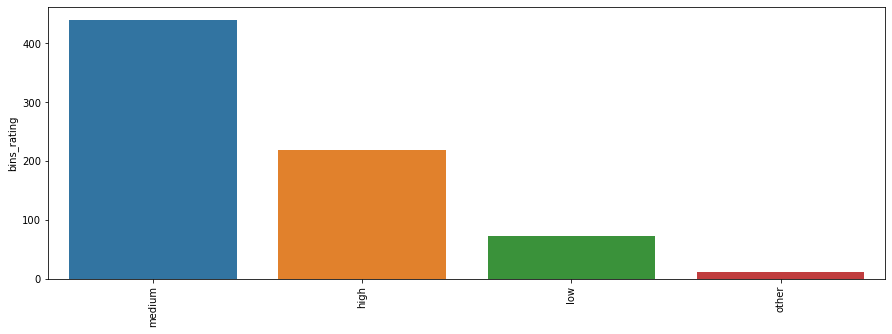

Plot for state_location


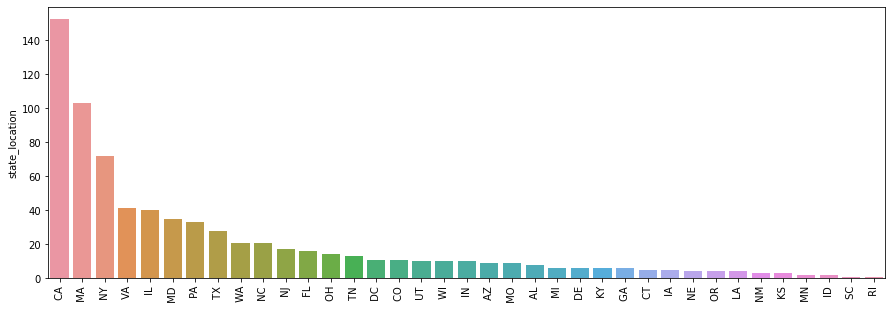

Plot for state_headquarters


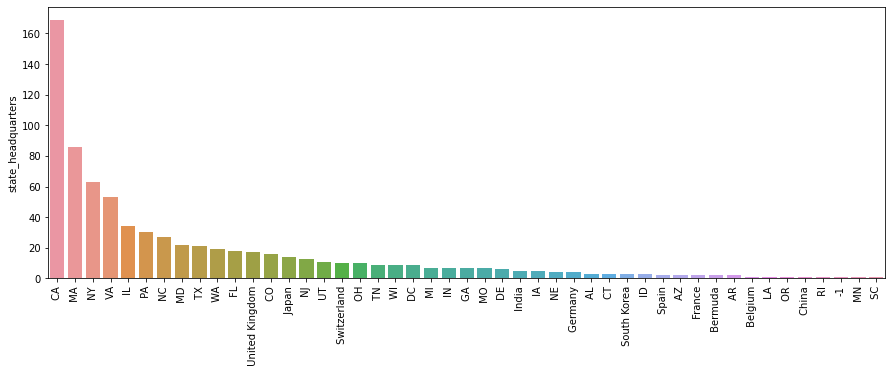

In [50]:
for col, typ in df.dtypes.items():
    if typ!='object':
        continue
    bar = df[col].value_counts()
    if len(bar)>100:
        print(f"skipping the column {col}")
        continue
    plt.subplots(figsize=(15,5))  
    ct=sns.barplot(x=bar.index, y=bar)
    ct.set_xticklabels(ct.get_xticklabels(), rotation=90)
    print(f"Plot for {col}")
    plt.show()

Plot for Job Title


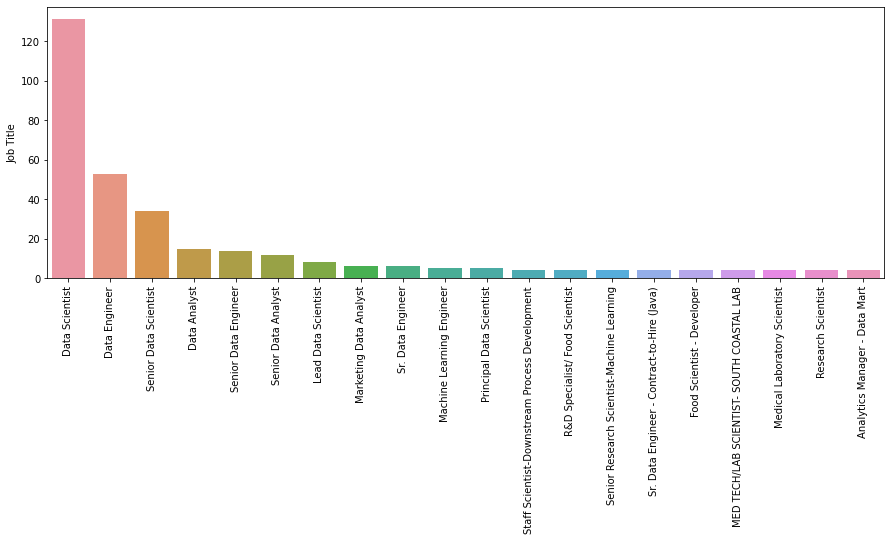

Plot for Salary Estimate


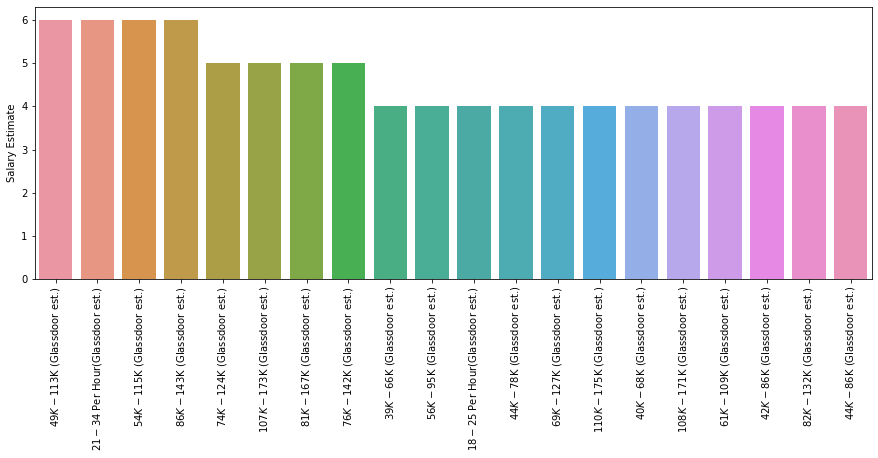

Plot for Job Description


C:\Users\veere\.conda\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\veere\.conda\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


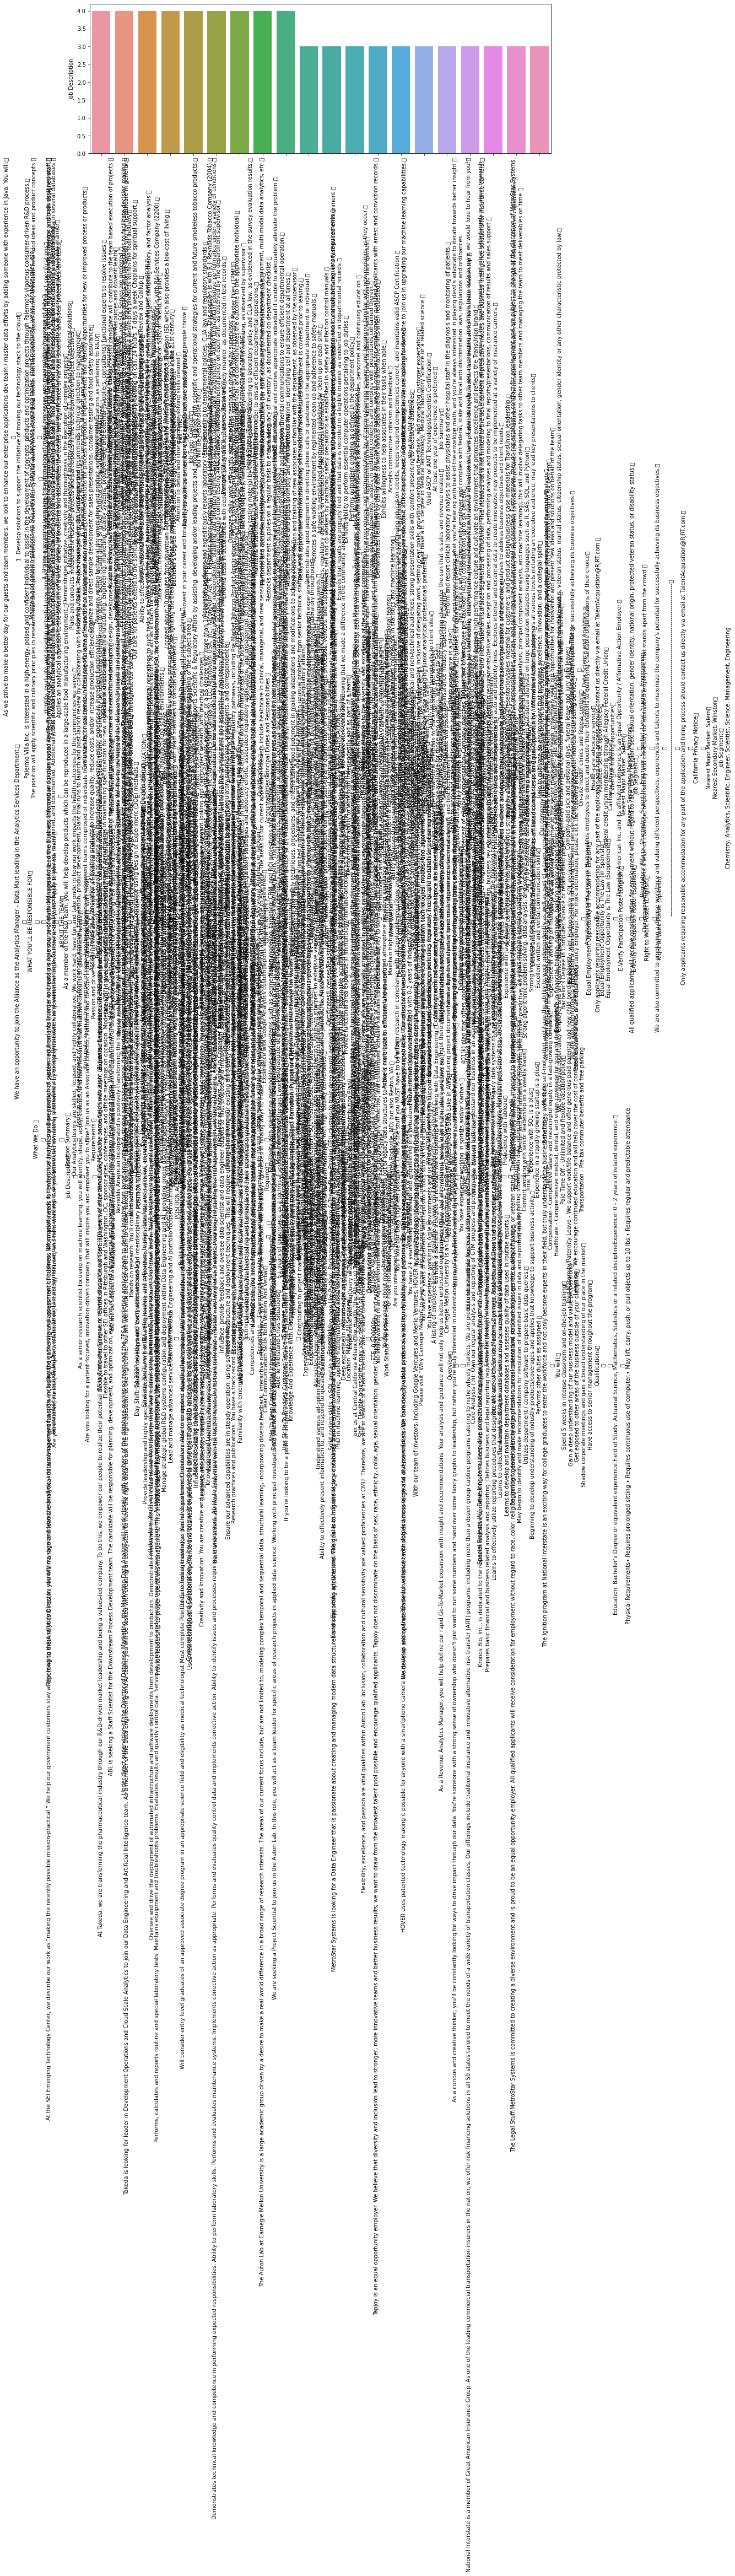

Plot for Company Name


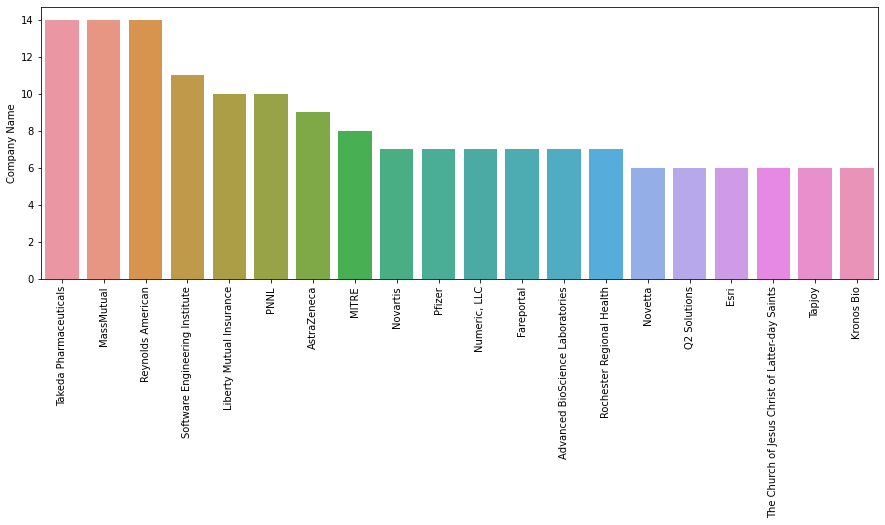

Plot for Location


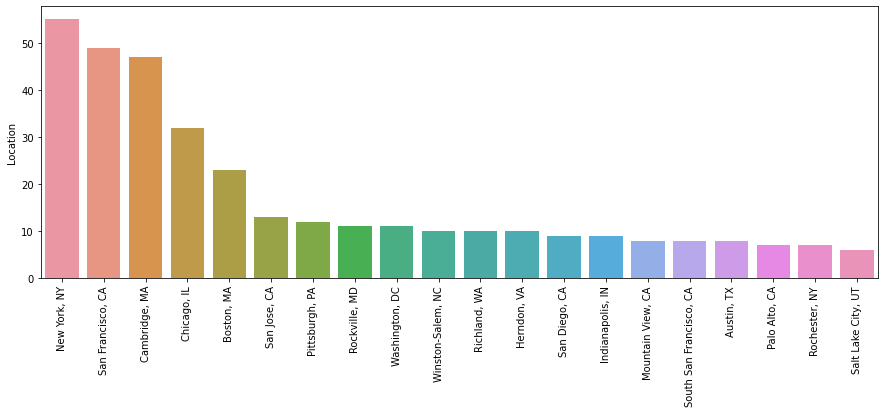

Plot for Headquarters


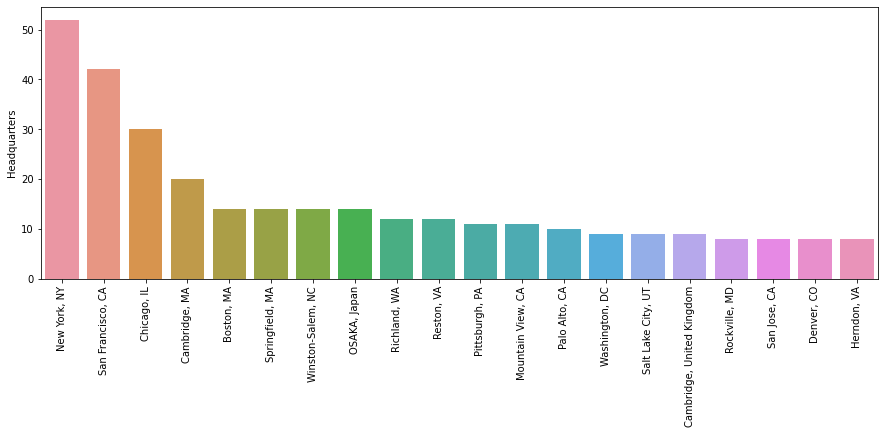

Plot for Size


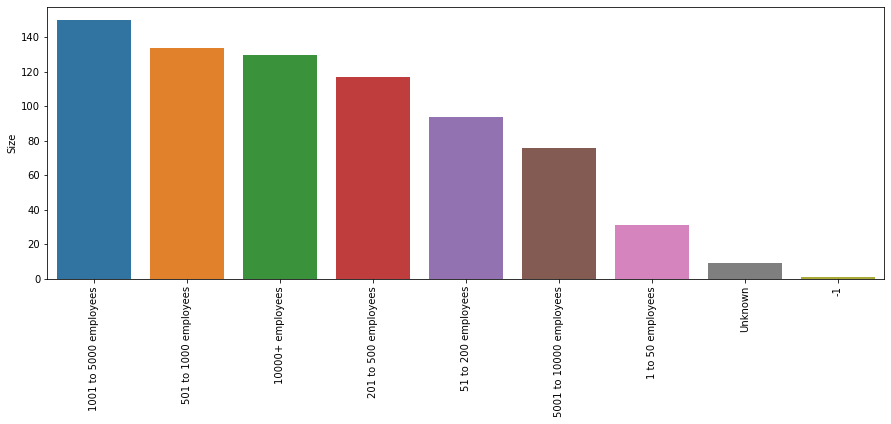

Plot for Type of ownership


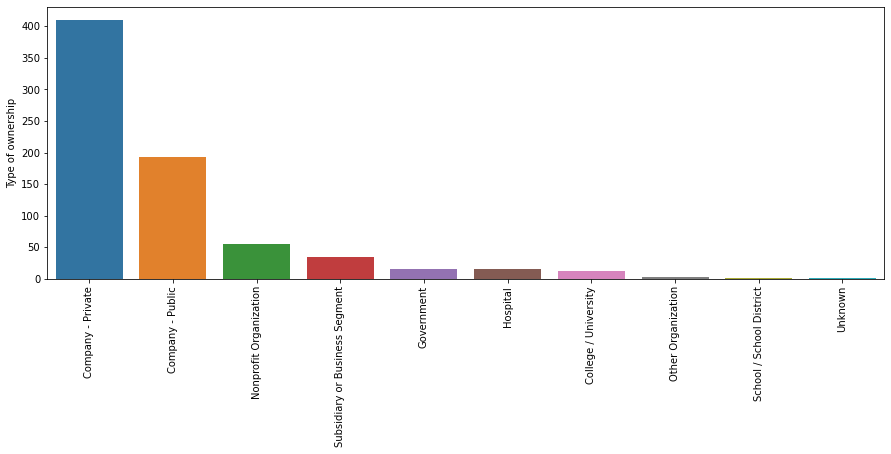

Plot for Industry


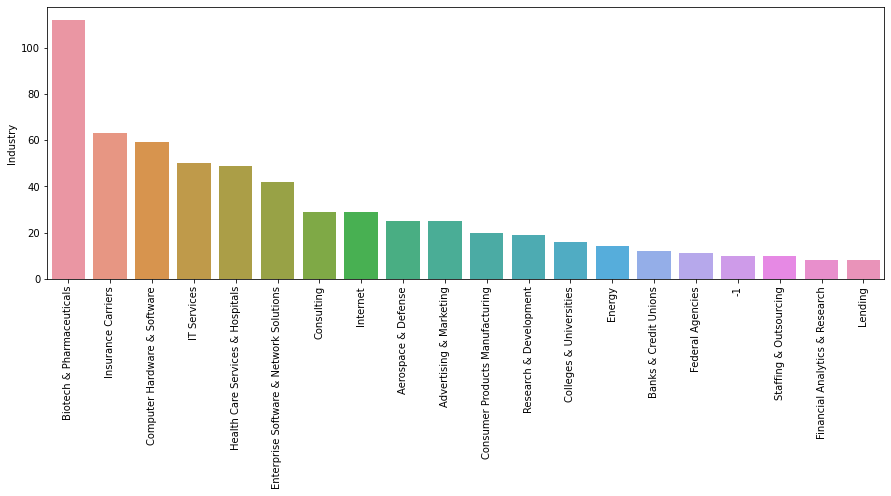

Plot for Sector


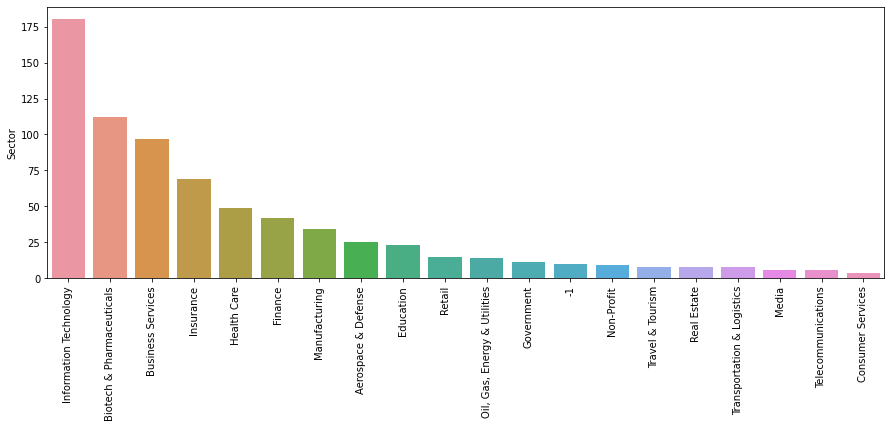

Plot for Revenue


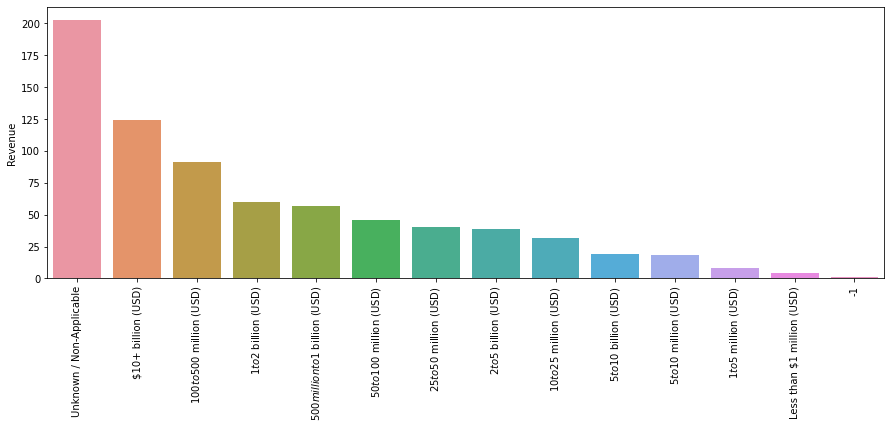

Plot for Competitors


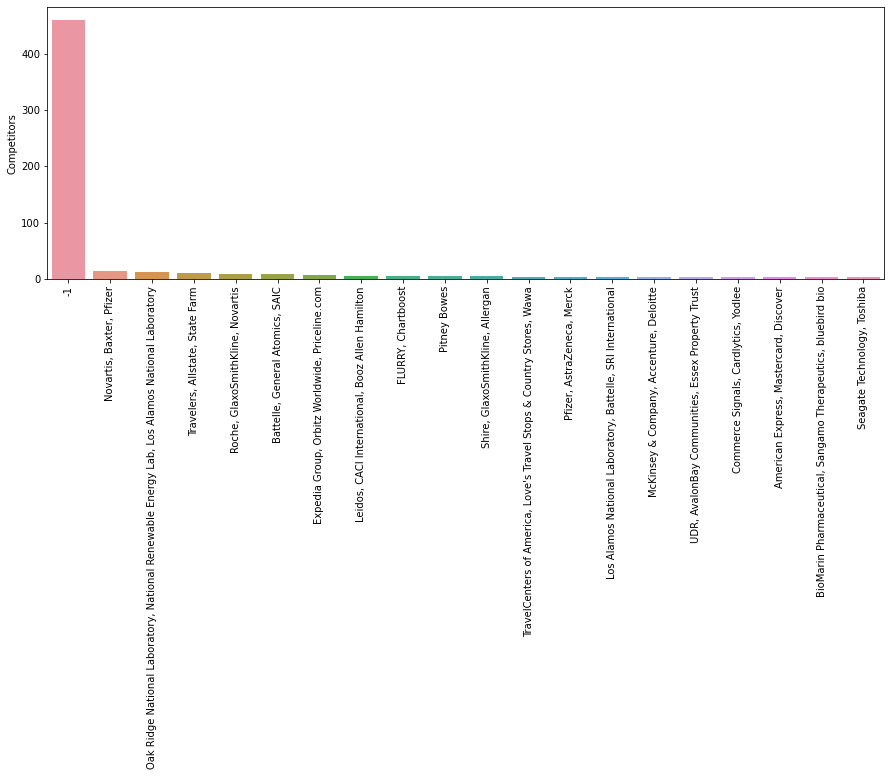

Plot for title


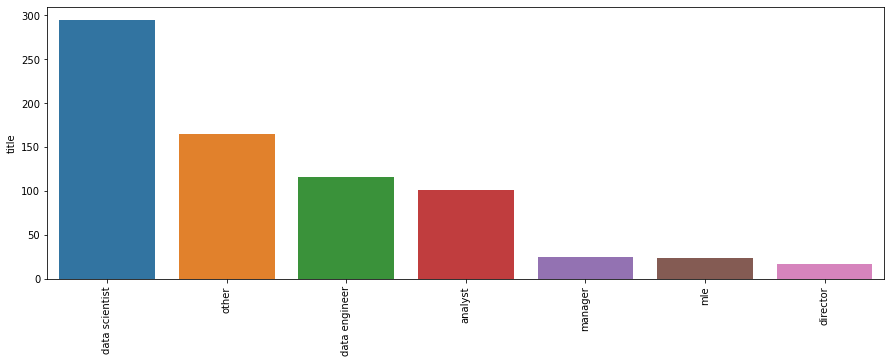

Plot for level


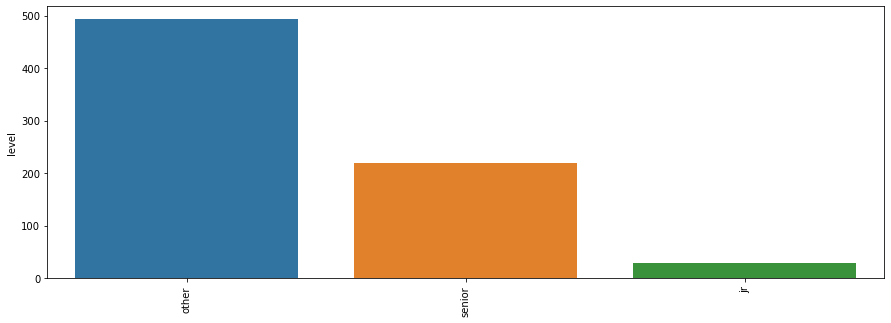

Plot for bins_rating


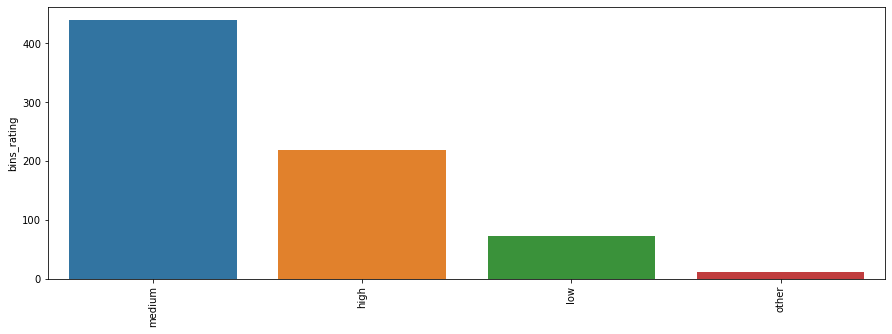

Plot for state_location


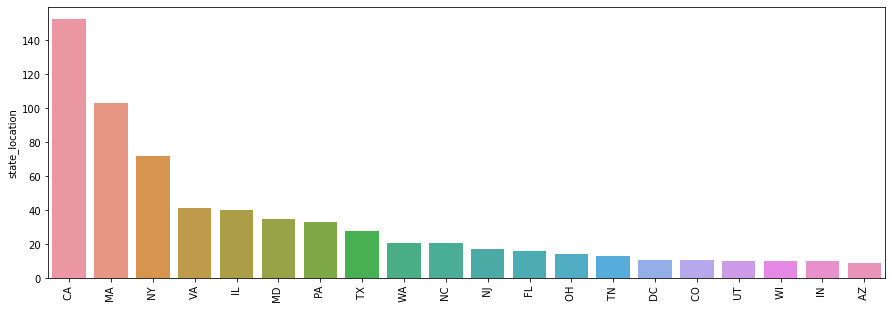

Plot for state_headquarters


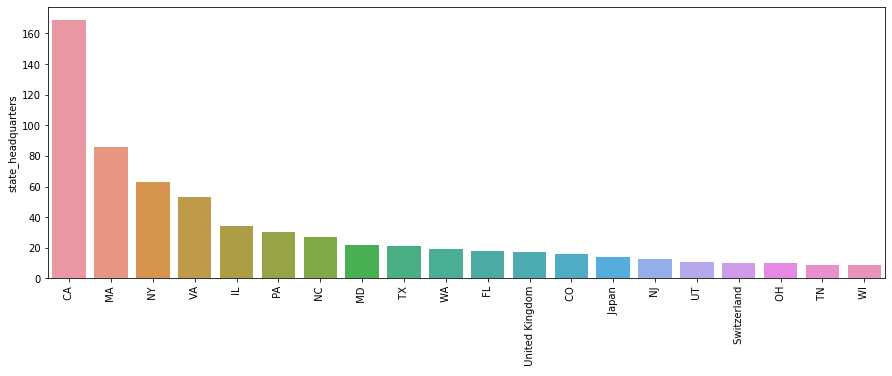

In [51]:
for col, typ in df.dtypes.items():
    if typ!='object':
        continue
    bar = df[col].value_counts()[:20]#consider top 20
    plt.subplots(figsize=(15,5))  
    ct=sns.barplot(x=bar.index, y=bar)
    ct.set_xticklabels(ct.get_xticklabels(), rotation=90)
    print(f"Plot for {col}")
    plt.show()

In [52]:
pd.pivot_table(df, index = 'title', values = 'avg_salary')


avg_salary
title                     
analyst          66.082574
data engineer   104.133621
data scientist  115.798305
director        166.117647
manager          93.220000
mle             126.195652
other            86.334303

In [55]:
pd.pivot_table(df, index = 'title', values = 'avg_salary', aggfunc='count')


avg_salary
title                     
analyst                101
data engineer          116
data scientist         295
director                17
manager                 25
mle                     23
other                  165

In [56]:
pd.pivot_table(df, index = ['title','level'], values = 'avg_salary')


avg_salary
title          level             
analyst        jr       47.250000
               other    62.666667
               senior   80.012593
data engineer  jr       65.500000
               other    95.259740
               senior  124.689189
data scientist jr       77.000000
               other   107.196335
               senior  134.938776
director       jr      148.700000
               other   173.375000
manager        other    86.760870
               senior  167.500000
mle            other   119.133333
               senior  139.437500
other          jr       75.750000
               other    76.317982
               senior  110.843750

In [57]:
pd.pivot_table(df, index = ['title','level'], values = 'avg_salary', aggfunc='count')


avg_salary
title          level             
analyst        jr               8
               other           66
               senior          27
data engineer  jr               2
               other           77
               senior          37
data scientist jr               6
               other          191
               senior          98
director       jr               5
               other           12
manager        other           23
               senior           2
mle            other           15
               senior           8
other          jr               8
               other          109
               senior          48

In [61]:
print(pd.pivot_table(df, index = ['state_location','title'], values = 'avg_salary', aggfunc='count'))
print(pd.pivot_table(df, index = ['state_location','title'], values = 'avg_salary'))

                               avg_salary
state_location title                     
 AL            analyst                  4
               data engineer            1
               data scientist           1
               other                    2
 AZ            analyst                  1
               data engineer            5
               data scientist           3
 CA            analyst                 18
               data engineer           25
               data scientist          72
               manager                  9
               mle                      5
               other                   23
 CO            analyst                  1
               data engineer            3
               data scientist           3
               mle                      1
               other                    3
 CT            data scientist           2
               other                    3
 DC            analyst                  2
               data engineer      

In [58]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'title', 'level', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'tech_python', 'tech_java', 'tech_R', 'tech_spark', 'tech_aws',
       'tech_excel', 'len_description', 'bins_rating', 'state_location',
       'state_headquarters', 'job_in_headquarters', 'age', 'num_competitors'],
      dtype='object')

In [66]:

for i in df.columns:
    if 'avg_salary'==i:
        continue
    print(f"pivot {i} vs avg_salary")
    print(pd.pivot_table(df,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

pivot Job Title vs avg_salary
                                                    avg_salary
Job Title                                                     
Director II, Data Science - GRM Actuarial           254.000000
Principal Machine Learning Scientist                232.500000
Principal Data Scientist with over 10 years exp...  225.000000
Lead Data Engineer                                  205.000000
Director II, Data Science - GRS Predictive Anal...  194.500000
Staff Machine Learning Engineer                     181.000000
Director, Data Science                              179.500000
Principal Data Scientist                            176.300000
Sr. Scientist II                                    174.000000
Senior Quantitative Analyst                         173.000000
Data Scientist - Alpha Insights                     172.000000
Director, Precision Medicine Clinical Biomarker...  172.000000
Staff Data Scientist                                171.500000
Sr. Data Scientist - Anal

                avg_salary
state_location            
 CA             123.513158
 IL             116.662500
 DC             110.181818
 MA             107.322136
 NJ             104.558824
 MI             100.250000
 RI             100.000000
 NY              98.652778
 NC              98.452381
 MD              97.357143
 KY              97.000000
 VA              95.621951
 UT              94.150000
 PA              93.703636
 WA              93.190476
 TX              92.218571
 OR              92.125000
 IN              90.300000
 TN              89.026154
 OH              87.571429
 KS              87.000000
 AZ              85.666667
 MN              85.500000
 CO              84.949091
 MO              84.722222
 GA              80.666667
 IA              78.900000
 FL              77.625000
 NM              74.333333
 WI              73.300000
 CT              71.100000
 SC              60.500000
 AL              57.937500
 LA              56.850000
 ID              56.250000
 

In [68]:
pd.pivot_table(df, index = 'Revenue', columns = 'tech_python', values = 'avg_salary', aggfunc = 'count')

tech_python                          0      1
Revenue                                      
$1 to $2 billion (USD)            16.0   44.0
$1 to $5 million (USD)             1.0    7.0
$10 to $25 million (USD)          16.0   16.0
$10+ billion (USD)                66.0   58.0
$100 to $500 million (USD)        47.0   44.0
$2 to $5 billion (USD)            17.0   22.0
$25 to $50 million (USD)          24.0   16.0
$5 to $10 billion (USD)            9.0   10.0
$5 to $10 million (USD)            9.0    9.0
$50 to $100 million (USD)         21.0   25.0
$500 million to $1 billion (USD)  29.0   28.0
-1                                 1.0    NaN
Less than $1 million (USD)         1.0    3.0
Unknown / Non-Applicable          93.0  110.0

In [69]:
pd.pivot_table(df, index = 'Revenue', columns = 'tech_python', values = 'avg_salary')

tech_python                                0           1
Revenue                                                 
$1 to $2 billion (USD)             80.093750  113.420455
$1 to $5 million (USD)            102.000000  121.785714
$10 to $25 million (USD)           83.002500  119.843750
$10+ billion (USD)                103.090909  129.698276
$100 to $500 million (USD)         72.398723  100.068182
$2 to $5 billion (USD)             80.461176  106.886364
$25 to $50 million (USD)           79.166667   88.343750
$5 to $10 billion (USD)            74.888889  111.550000
$5 to $10 million (USD)           112.111111  140.111111
$50 to $100 million (USD)          77.839048  122.820000
$500 million to $1 billion (USD)   79.224138   95.035714
-1                                117.500000         NaN
Less than $1 million (USD)         98.500000  112.000000
Unknown / Non-Applicable           97.196344  111.500000

In [ ]:
# We can conclude that with python having more salary

In [73]:
for col in df.columns:
    if 'tech' not in col:
        continue
    print(f"tech {col}")
    print(pd.pivot_table(df, index = 'Revenue', columns = col, values = 'avg_salary'))

tech tech_python
tech_python                                0           1
Revenue                                                 
$1 to $2 billion (USD)             80.093750  113.420455
$1 to $5 million (USD)            102.000000  121.785714
$10 to $25 million (USD)           83.002500  119.843750
$10+ billion (USD)                103.090909  129.698276
$100 to $500 million (USD)         72.398723  100.068182
$2 to $5 billion (USD)             80.461176  106.886364
$25 to $50 million (USD)           79.166667   88.343750
$5 to $10 billion (USD)            74.888889  111.550000
$5 to $10 million (USD)           112.111111  140.111111
$50 to $100 million (USD)          77.839048  122.820000
$500 million to $1 billion (USD)   79.224138   95.035714
-1                                117.500000         NaN
Less than $1 million (USD)         98.500000  112.000000
Unknown / Non-Applicable           97.196344  111.500000
tech tech_java
tech_java                                  0           1

In [3]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veere\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)



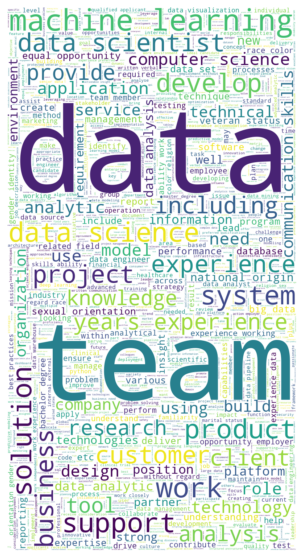

In [15]:
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()